# Pandas Lab Exercise

## Part - 1
We shall now test your skills using Pandas package. We will be using [games dataset](https://www.kaggle.com/gutsyrobot/games-data/data).

Answer each question wrt the games dataset

**Import pandas as pd**

In [1]:
import pandas as pd

# Additional imports for future use
import numpy as np

**Read games.csv as a dataframe called games**

In [2]:
games = pd.read_csv('games.csv')

**Check the head of the dataframe**

In [3]:
games.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


**Use .info() method to find out total number of entries in the dataset**

In [4]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81312 entries, 0 to 81311
Data columns (total 20 columns):
id                      81312 non-null int64
type                    81312 non-null object
name                    81271 non-null object
yearpublished           81309 non-null float64
minplayers              81309 non-null float64
maxplayers              81309 non-null float64
playingtime             81309 non-null float64
minplaytime             81309 non-null float64
maxplaytime             81309 non-null float64
minage                  81309 non-null float64
users_rated             81312 non-null int64
average_rating          81312 non-null float64
bayes_average_rating    81312 non-null float64
total_owners            81312 non-null int64
total_traders           81312 non-null int64
total_wanters           81312 non-null int64
total_wishers           81312 non-null int64
total_comments          81312 non-null int64
total_weights           81312 non-null int64
average_weight  

**What is the mean playing time for all games put together**

In [5]:
games['playingtime'].mean()
np.mean(games['playingtime'])

51.63478827682052

**What is the highest number of comments received for a game**

In [6]:
games['total_comments'].max()

11798

**What is the name of the game with id 1500**

In [7]:
gm = games[games['id']==1500]
gm['name']

10592    Zocken
Name: name, dtype: object

**And which year was it published**

In [8]:
gm['yearpublished']

10592    1999.0
Name: yearpublished, dtype: float64

In [9]:
games[games['total_comments']==games['total_comments'].max()]['name']

165     Catan
1965    Catan
Name: name, dtype: object

**Which game has received least number of comments**

In [10]:
games[games['total_comments']==games['total_comments'].max()]['name']

165     Catan
1965    Catan
Name: name, dtype: object

**What is the average minage of all games per game "type"? (boardgame & boardgameexpansion)**

In [11]:
games.groupby('type')['minage'].mean()

type
boardgame             6.724798
boardgameexpansion    8.733321
Name: minage, dtype: float64

**How many unique games are there in the dataset?**

In [12]:
games['type'].nunique()

2

**How many boardgames & boardgameexpansions are there in the dataset?**

In [13]:
games['type'].value_counts()

boardgame             70820
boardgameexpansion    10492
Name: type, dtype: int64

**Is there a correlation between playing time and total comments for the games?**

In [14]:
games[['playingtime','total_comments']].corr()

,playingtime,total_comments
playingtime,1.000000,0.020645
total_comments,0.020645,1.000000



## Part - 2

## Data Visualization using Seaborn

**Import seaborn library and set color codes to true**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)
%matplotlib inline

**Drop NA values for negating issues during visualization**

In [16]:
games.isna().values.any() # Check for any Empty data
games.isnull().values.any() # Check for any missing values

True

In [17]:
games.dropna(inplace=True)

In [18]:
games.isna().values.any()

False

**View the Distance plot for average rating**

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


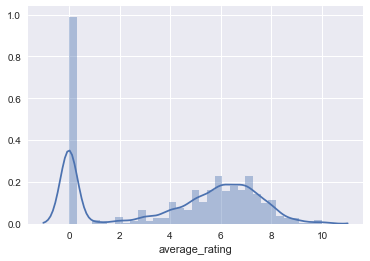

In [19]:
sns.distplot(games['average_rating'])

**Is there a linear relationship between minage and average rating ?**

D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\Installation\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


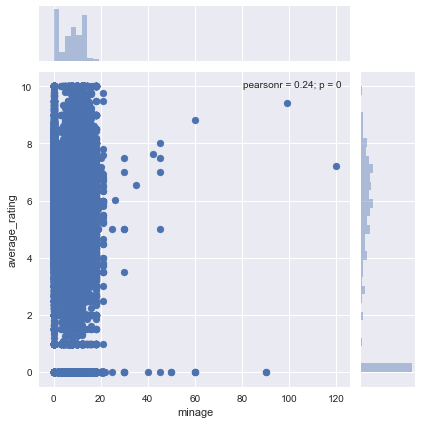

In [20]:
sns.jointplot('minage', 'average_rating', data=games)

**Compare the relationship between playing time, minage and avg rating using pairplot**

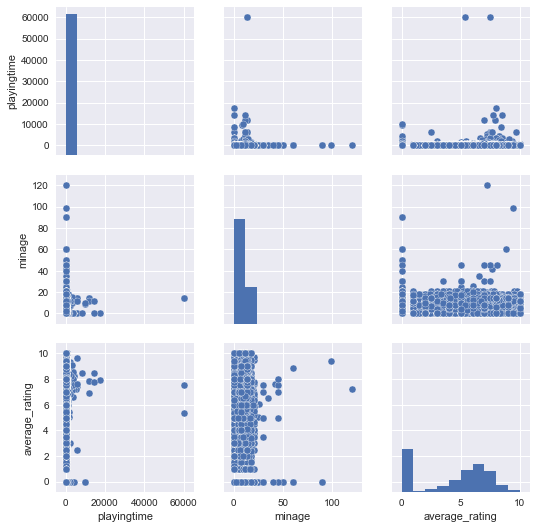

In [21]:
sns.pairplot(games[['playingtime', 'minage', 'average_rating']])

**Compare type of game and playing time using stripplot**

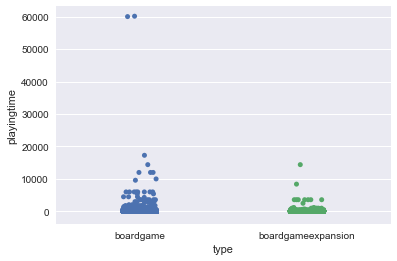

In [22]:
sns.stripplot('type', 'playingtime', data=games, jitter=True)

**Analyse the linear trend between playing time less then 500 mins and avg rating received from the same**

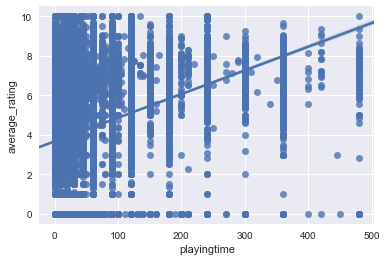

In [23]:
sns.regplot('playingtime', 'average_rating', data=games[games['playingtime'] < 500])